# Tikhonov regularisation

The L-Curve method is a way to obtain approximate solutions to strongly ill-conditioned least-squares problems. Consider the least-squares problem 
$$
\hat{x} = \text{arg min} \|Ax-b\|_2,
$$

where $A$ is strongly ill-conditioned. We expect the small singular values in $A$ to blow up the solution vector $x$. In practice, this is often not desirable. We would like to obtain a solution $x$ that has small norm, but at the same time gives a small residual. One way to achieve this is the L-curve method.

Instead of solving the above least-squares problem we write down a modified problem of the form
$$
\hat{x}_{\lambda} = \text{arg min} (\|Ax-b\|_2^2 + \lambda^2\|x\|_2^2),
$$
where the solution now depends on the parameter $\lambda$. Hence, instead of just minimising the residual we are attempting to minimise a weighted residual that penalises a large norm of $x$.

* Reformulate the above least-squres problem in the form of a standard least-squares problem $\hat{x}_{\lambda} = \text{arg min} \|\tilde{A}_\lambda x - \tilde{b}\|_2$ with suitable matrices $\tilde{A}$ and $\tilde{b}$.

* Solve a sequence of least-squares problems for the parameter $\lambda$ geometrically spaced between $10^{-2}$ and $10$. Generate a plot of the norm $\|x\|_2$ in dependence of the residual $\|\tilde{A}_{\lambda}x-b\|_2$ for the different $\lambda$ values, that is the x-axis has the residual and the y-axis has the associated norm. Determine a value $\lambda$, which is at the kink of the L-curve. What is the associated residual and the associated norm?

We can reformulate the modified least-squares problem
$$
\hat{x}_{\lambda} = \text{arg min} (\|Ax-b\|_2^2 + \lambda^2\|x\|_2^2),
$$

as
$$
\hat{x}_{\lambda} = \text{arg min}\|\tilde{A}_\lambda x - \tilde{b}\|_2
$$

where $\tilde{A}_\lambda=\begin{pmatrix} A \\ \lambda I \end{pmatrix}$ and $\tilde{b}=\begin{pmatrix} b \\ \mathbf{0} \end{pmatrix}$.

In [7]:
%matplotlib inline
import numpy as np
import scipy.linalg
import matplotlib.pyplot as plt

Text(0.5, 0, '$\\|\\|\\tilde{A}_{\\lambda}x-b\\|\\|_2$')

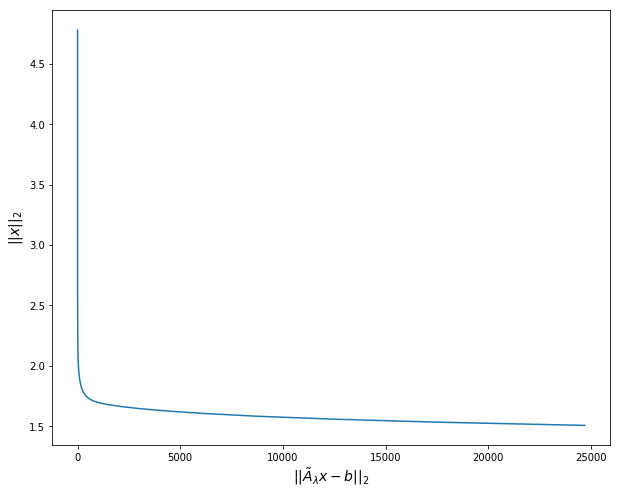

In [8]:
n = 50
rand = np.random.RandomState(0)
sigma = np.diag(np.geomspace(100, 1E-15, n))
x_exact = np.ones(n)
A = rand.randn(2 * n, n) @ sigma @ rand.randn(n, n)
b = A @ x_exact + 5E-2 * rand.randn(2 * n)

lambda_list = np.geomspace(100, 1E-2, n)
x_norm_list = []
residual_list = []

for i in lambda_list:
    A_tilde = np.block([[A], [np.diag(np.repeat(i, n))]])
    b_tilde = np.hstack((b, np.zeros(n)))
    leastsquares = np.linalg.lstsq(A_tilde, b_tilde, rcond=None)
    x_leastsquares = leastsquares[0]
    residual = leastsquares[1]
    x_norm_list.append(np.linalg.norm(x_leastsquares))
    residual_list.append(residual[0])
    
plt.figure(figsize = (10, 8))
plt.plot(residual_list,x_norm_list)
plt.ylabel(r'$\|\|x\|\|_2$', fontsize=14)
plt.xlabel(r'$\|\|\tilde{A}_{\lambda}x-b\|\|_2$', fontsize=14)

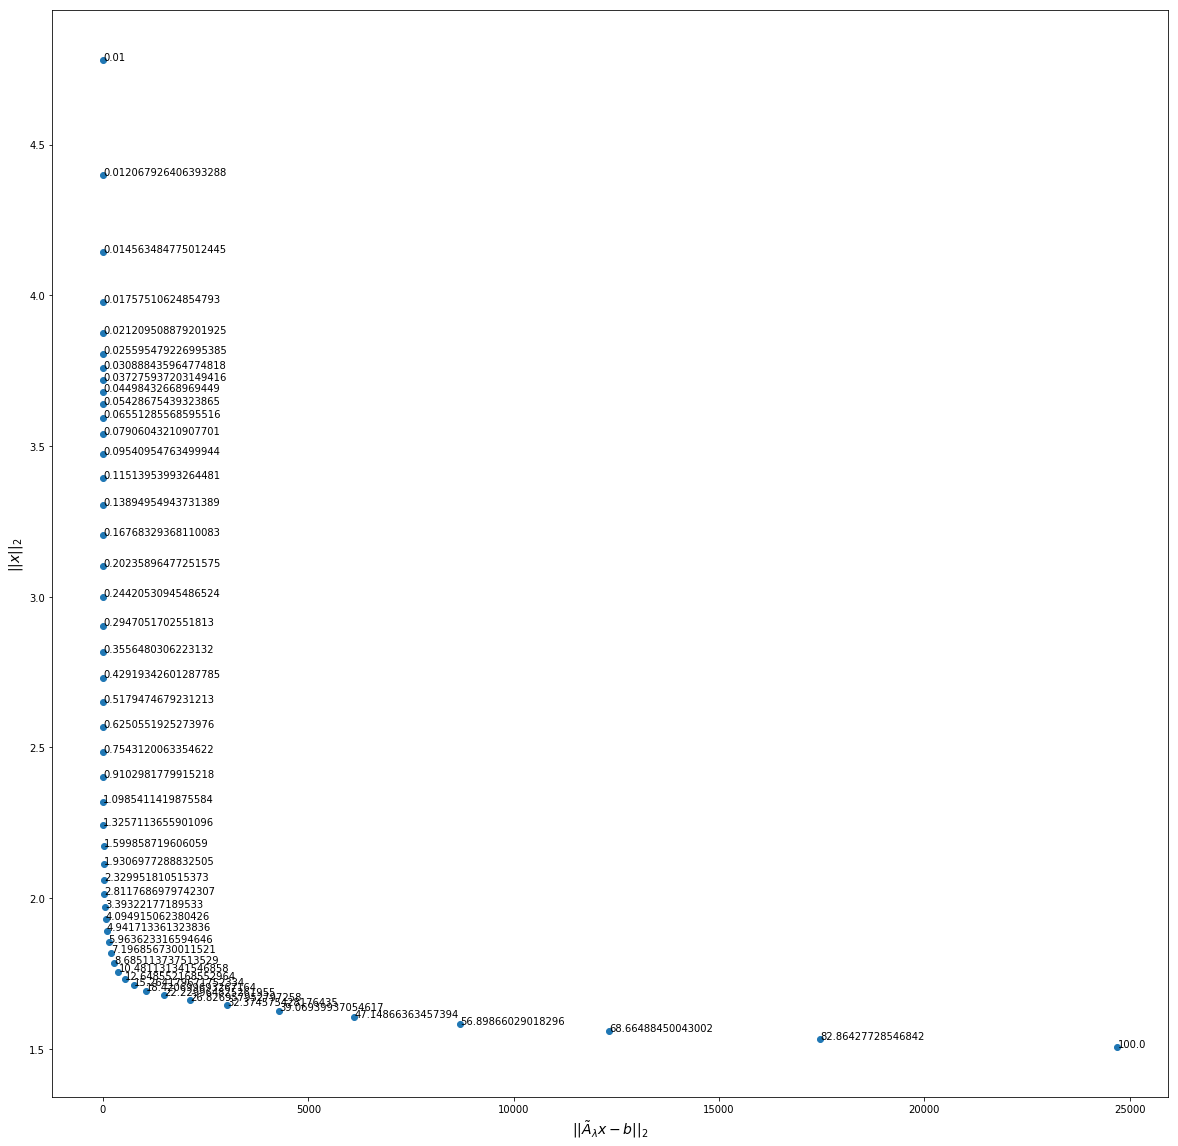

In [9]:
plt.figure(figsize=(20, 20))
plt.scatter(residual_list, x_norm_list)
plt.ylabel(r'$\|\|x\|\|_2$', fontsize=14)
plt.xlabel(r'$\|\|\tilde{A}_{\lambda}x-b\|\|_2$', fontsize=14)

for i, txt in enumerate(lambda_list):
    plt.annotate(txt, (residual_list[i], x_norm_list[i]))

Looking at the above plot, it appears that the kink occurs somewhere around $\lambda = 10.48113$

In [12]:
print(lambda_list) # 10.48113 is the 13th element of the list
print(x_norm_list[12], residual_list[12])

[1.00000000e+02 8.28642773e+01 6.86648845e+01 5.68986603e+01
 4.71486636e+01 3.90693994e+01 3.23745754e+01 2.68269580e+01
 2.22299648e+01 1.84206997e+01 1.52641797e+01 1.26485522e+01
 1.04811313e+01 8.68511374e+00 7.19685673e+00 5.96362332e+00
 4.94171336e+00 4.09491506e+00 3.39322177e+00 2.81176870e+00
 2.32995181e+00 1.93069773e+00 1.59985872e+00 1.32571137e+00
 1.09854114e+00 9.10298178e-01 7.54312006e-01 6.25055193e-01
 5.17947468e-01 4.29193426e-01 3.55648031e-01 2.94705170e-01
 2.44205309e-01 2.02358965e-01 1.67683294e-01 1.38949549e-01
 1.15139540e-01 9.54095476e-02 7.90604321e-02 6.55128557e-02
 5.42867544e-02 4.49843267e-02 3.72759372e-02 3.08884360e-02
 2.55954792e-02 2.12095089e-02 1.75751062e-02 1.45634848e-02
 1.20679264e-02 1.00000000e-02]
1.7557101674644093 378.08057457900463


Hence, the associated residual is $\|\tilde{A}_{\lambda}x-b\|_2=378.08057$ and the associated norm is $\|x\|_2=1.75571$